

<h3 align="center">Random Forest Regressor</h3> 




In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

In [14]:
# Loding the data.
car = pd.read_csv('D:\DOWNLOAD\CAR_ANYLIST\Car_Prices\Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Sẽ tạo dictionary cho mọi cột danh mục để lấy số giả cho nhãn danh mục của chúng. Nó sẽ được sử dụng trong giai đoạn sau khi tạo ứng dụng web

In [15]:
# tạo từ điển cho mỗi cột categoricla
brand_dic = dict()
body_dic = dict()
engine_type_dic = dict()
registration_dic = dict()
model_dic =dict()

In [16]:

car.columns = car.columns.str.strip()
print(car.columns)

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')


In ra các cột

In [ ]:
# Tạo cột mã hóa chỉ dành cho các cột danh mục
from sklearn.preprocessing import LabelEncoder
# tạo một phiên bản của labelEncoder
le = LabelEncoder()


# Brand column
car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
  brand_dic[lbl] = num
print('Brand Label saved')

# Body column
car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
  body_dic[lbl] = num
print('Body label saved')


# Engine type
car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
  engine_type_dic[lbl]=num
print('Engine type label saved')

# Registration column
car['regis_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
  registration_dic[lbl]=num
print('Registration label saved')

# Model
car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
  model_dic[lbl]=num
print('Model label saved')

# bỏ cột phân loại cũ
car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)

car_2.head()

Brand Label saved
Body label saved
Engine type label saved
Registration label saved
Model label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,regis_enc,model_enc
0,4200.0,277,2.0,1991,1,3,3,1,17
1,7900.0,427,2.9,1999,2,5,0,1,248
2,13300.0,358,5.0,2003,2,3,1,1,222
3,23000.0,240,4.2,2007,0,0,3,1,211
4,18300.0,120,2.0,2011,5,0,3,1,214


### Các mô hình dựa cây được biết đến là rất mạnh mẽ và tập hợpcận tổng hợp là một trong những thuật toán học máy được sử dụng phổ biến nhất .Các mô hình dựa trên cây được biết đến là rất mạnh mẽ và phương pháp tiếp cận tổng hợp RandomForestlà một trong những thuật toán học máy được sử dụng phổ biến nhất. Ưu điểm chính của nó là yêu cầu xử lý dữ liệu trước tối thiểu và thường mang lại hiệu suất mạnh mẽ.

In [19]:
#  X and y
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [20]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [24]:
# importing RandomForest Regressior
from sklearn.ensemble import  RandomForestRegressor

# creating instance of randomforest regressor
rf_1 = RandomForestRegressor()

# checking the hyperparameter of the randomforest 
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
# Đầu tiên tôi sẽ tạo một mô hình cơ sở sau đó sẽ tiến hành điều chỉnh siêu tham số
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
# kiểm tra hiệu suất training
y_pred_train = rf_1.predict(X_train)

# importing the rmse from sklearn
from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))


RMSE on Traning data 2004.1252975498107


In [27]:
# error on testing data
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 4882.333133570697


In [28]:
# kiểm tra điểm số trên dữ liệu đào tạo.
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

Traning Score: 0.9886503203666521


In [29]:
# chceking the socre for testing.

y_pred_test = rf_1.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

Testing Score: 0.9411540790574706


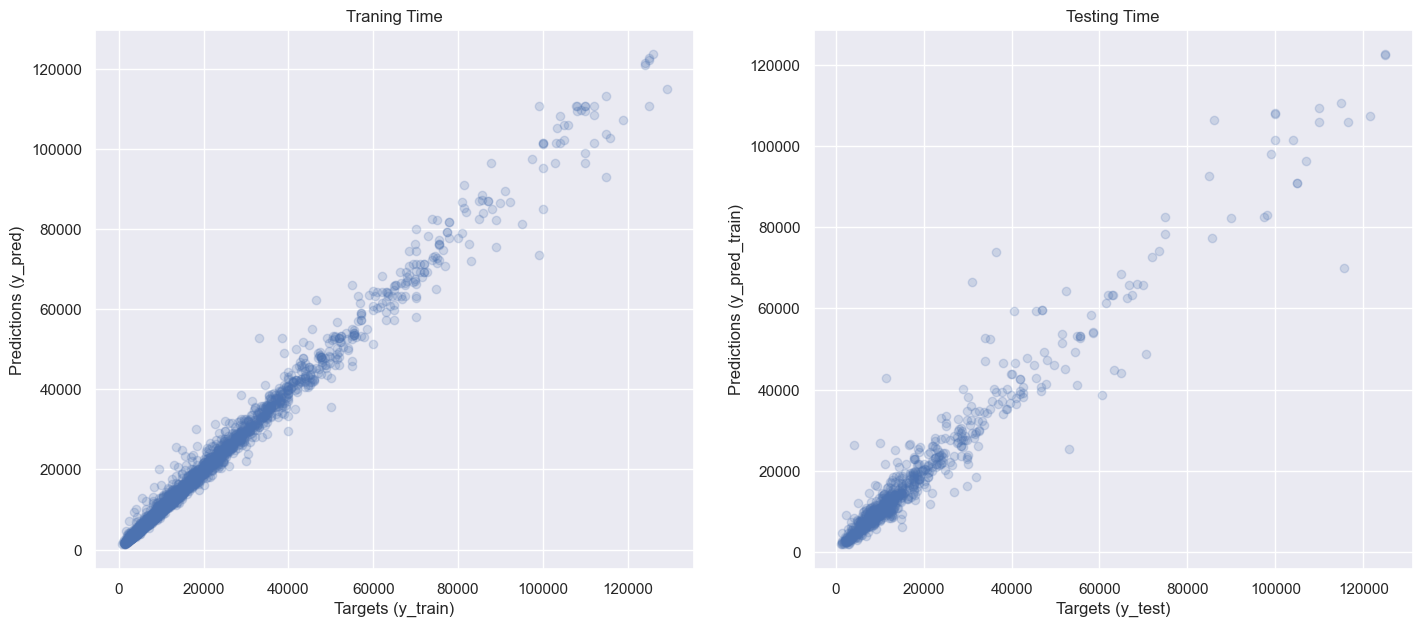

In [30]:
# vẽ biểu đồ đào tạo
# kiểm tra dự đoán với các giá trị ban đầu
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');


## Kiểm tra giá trị còn lại của mô hình cơ sở.

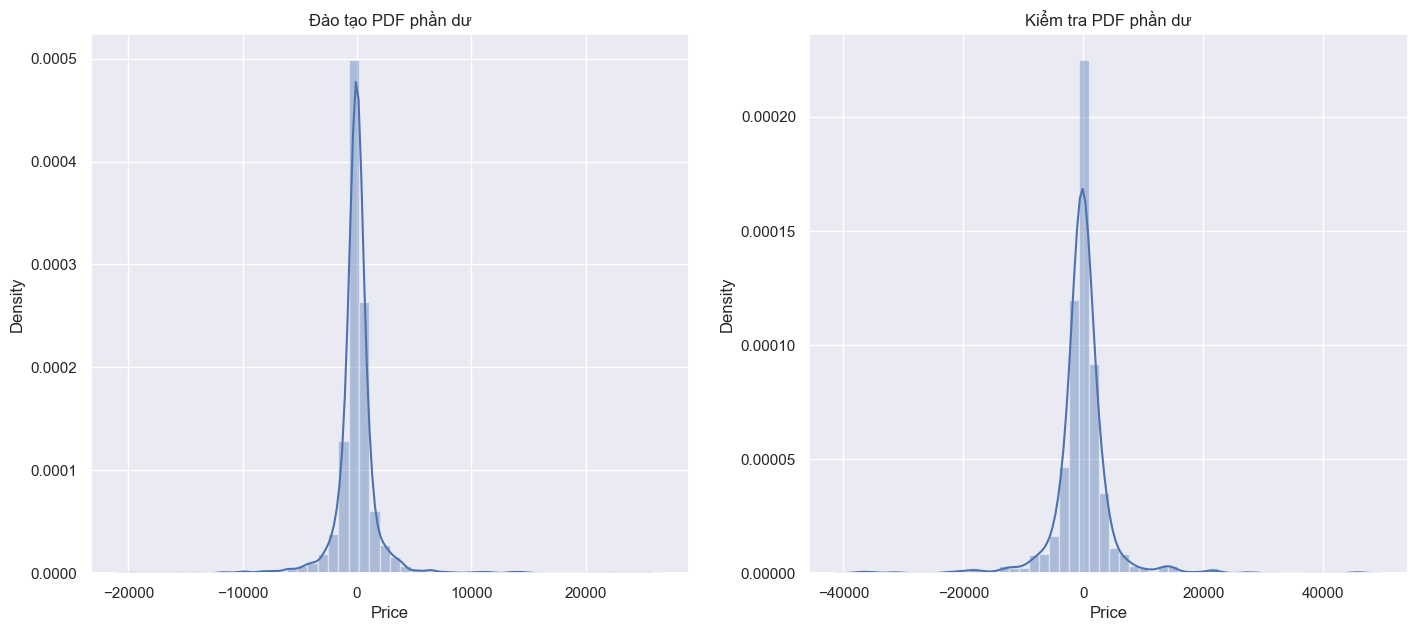

In [31]:
# vẽ biểu đồ phân phối của phần dư
residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

# vẽ biểu đồ phân phối của phần dư khi đào tạo
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Đào tạo PDF phần dư');

# vẽ biểu đồ phân phối của phần dư
plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Kiểm tra PDF phần dư');

In [32]:
# Tạo một khung dữ liệu để so sánh kết quả và dự đoán.
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
# thêm cột
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# tạo các cột còn lại và cột chênh lệch
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# kiểm tra dữ liệu hiệu suất
df_eval

,Prediction,Tareget,Residual,Difference%
0,18016.820000,19000.0,983.180000,5.174632
1,6220.200000,5500.0,-720.200000,13.094545
2,25819.980000,19200.0,-6619.980000,34.479062
3,12833.980000,11900.0,-933.980000,7.848571
4,9006.440000,7750.0,-1256.440000,16.212129
...,...,...,...,...
769,105938.550000,116500.0,10561.450000,9.065622
770,10938.285000,13200.0,2261.715000,17.134205
771,28278.623333,27500.0,-778.623333,2.831358
772,15368.330000,16500.0,1131.670000,6.858606


In [33]:
# mô tả của eval_df
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18830.257859,18602.017829,-228.240029,17.182916
std,19482.322307,20139.559184,4880.148886,30.192587
min,1915.400000,1200.000000,-37288.352000,0.000000
25%,7901.867500,7500.000000,-1386.106831,4.207067
50%,11959.535000,11900.000000,-138.530000,9.599801
75%,21704.662500,20999.060000,1002.990000,20.785181
max,122523.870000,125000.000000,45708.605000,544.120000


###  ĐĐiều chỉnh siêu tham số để tạo ra mô hình tổng quát hơn.

In [34]:
# bắt đầu điều chỉnh siêu tham số

# thực hiện điều chỉnh siêu tham số với RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# tạo phiên bản của RandomForest
rf_random = RandomForestRegressor()

# tạo tham số ngẫu nhiên
random_grid = {'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, None], # số lượng cấp độ tối đa trong mỗi cây quyết định
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 7],
'n_estimators': [100,200]} # có bao nhiêu cây quyết định

# tạo phiên bản của randomsearch csv
rf_random = RandomizedSearchCV(estimator=rf_random,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=8,
                               n_jobs=-1)

# starting the search
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [35]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': False},
 np.float64(0.9277970492472961))

In [36]:
# kiểm tra điểm của tham số điều chỉnh ngẫu nhiên
# kiểm tra lỗi đào tạo
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

np.float64(630.1717140691799)

In [ ]:
# kiểm tra lỗi thử nghiệm
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

np.float64(4158.878769987111)

Có vẻ như mô hình vẫn đang ở trạng thái quá phù hợp. Nó khiến lỗi đào tạo là `630` và lỗi thử nghiệm là `4177`.

Bây giờ tôi sẽ thử với `GridSearchCV`

In [38]:
# nhập gridseach cv
from sklearn.model_selection import GridSearchCV

# tạo một phiên bản của mô hình mới
rf_grid_model = RandomForestRegressor()

param_grid = {'bootstrap': [False],
'max_depth': [25,30,35],
'max_features': ['sqrt'],
'min_samples_leaf': [1,2],
'min_samples_split': [1,2,3],
'n_estimators': [100,150,200]}

# tìm kiếm tham số tốt nhất từ ​​hàng xóm của tham số cv tìm kiếm ngẫu nhiên
rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


# fitting on data
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [39]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       n_estimators=150),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 np.float64(0.9279693677044912))

In [40]:
# kiểm tra điểm của tham số điều chỉnh ngẫu nhiên
# kiểm tra lỗi đào tạo
np.sqrt(mean_squared_error(y_train, rf_grid.predict(X_train)))

np.float64(630.174853194036)

In [41]:
# kiểm tra lỗi thử nghiệm
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

np.float64(4158.878769987111)

Có vẻ như vấn đề phát sinh từ số lượng cây quyết định trong mô hình nội bộ. `n_estimators` Siêu tham số kiểm soát điều này và việc giảm nó có thể giúp giảm phương sai của mô hình.

Tuy nhiên, tôi nhận thấy rằng trong khi hầu hết các tham số đều hoạt động tốt, việc hạ thấp `n_estimators` sẽ làm tăng lỗi đào tạo. Vì vậy, trong trường hợp này, tôi cần chấp nhận một lỗi đào tạo cao hơn một chút để giảm phương sai và cải thiện khả năng khái quát hóa.

#### TThử lại GridSearchCV để tìm mô hình tốt nhất

In [42]:
# create an instance of new model
rf_grid_model_2 = RandomForestRegressor()


param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}


# searchin for best paramete from neighbour of random search cv parameter
rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


# fitting on data
rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [43]:
rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=3),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 100},
 np.float64(0.9282742496153756))

In [ ]:
# Đang kiểm tra lỗi đào tạo.
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))

997.3404495128468

In [44]:
# kiểm tra lỗi thử nghiệm
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))

np.float64(4232.104505127047)

#### mô hình có thể được sử dụng , nhưng nó vẫn cho thấy một khoảng cách đáng kể giữa lỗi đào tạo và lỗi kiểm tra , cho thấy hạn chếđánh giá chi tiết Mặc dù mô hình này có thể sử dụng được, nhưng nó vẫn cho thấy khoảng cách đáng kể giữa lỗi đào tạo và lỗi kiểm tra, cho thấy khả năng khái quát hóa hạn chế. Tiếp theo, tôi sẽ thực hiện đánh giá chi tiết hơn bằng mô hình  `rf_grid_2`

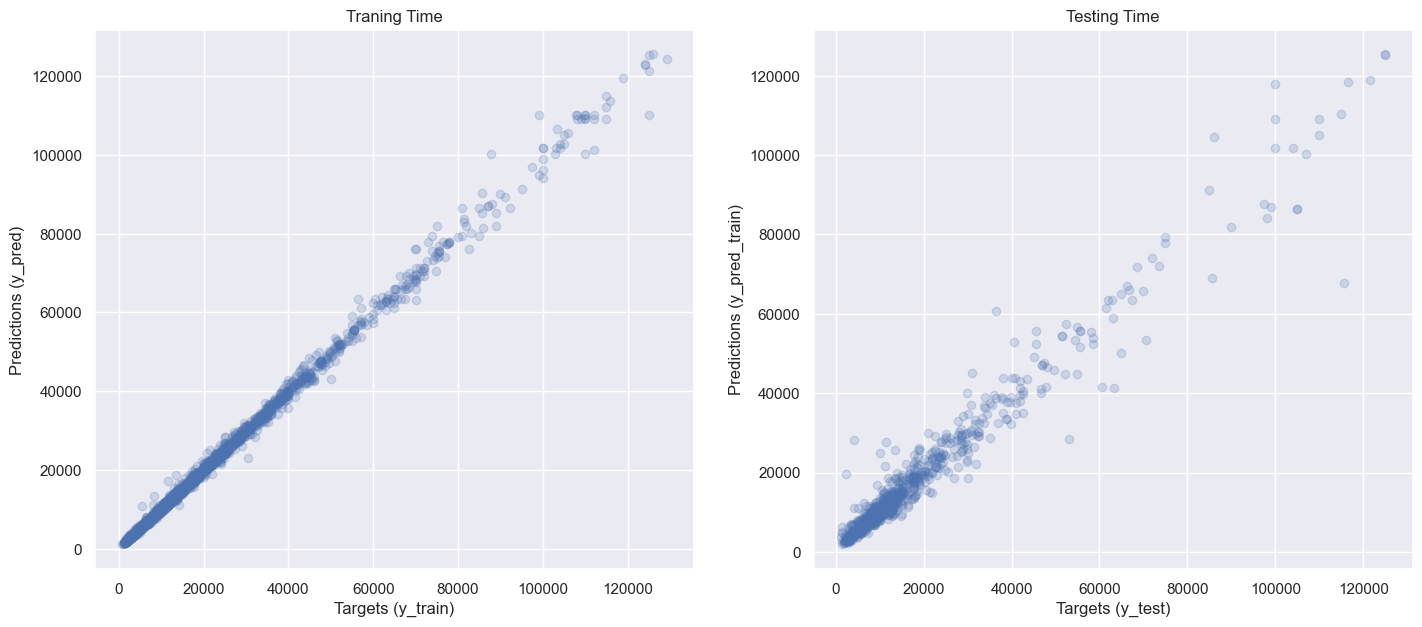

In [45]:
# vẽ biểu đồ đào tạo
# kiểm tra dự đoán với các giá trị ban đầu
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');
# vẽ biểu đồ lỗi thử nghiệm
y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');


Lỗi traning error rất ít

In [46]:
# kiểm tra điểm của mô hình cuối cùng
from sklearn.metrics import r2_score

print(f'Traning r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')

Traning r2_score: 0.9972125787588952
Testing r2_score: 0.9557845232030641


`RandomForest` vượt trội hơn `LinearRegression`

#  KKiểm tra phần còn lại

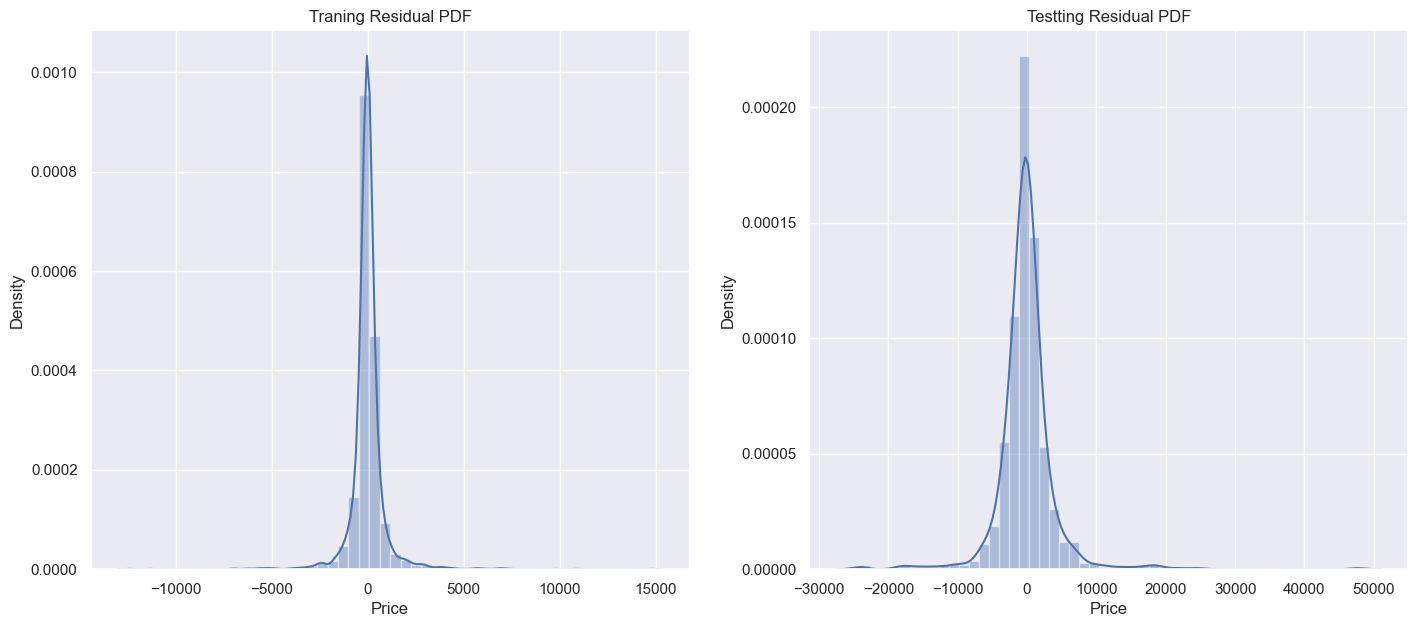

In [47]:
# vẽ biểu đồ phân phối của phần dư
residual_train = (y_train - rf_grid_2.predict(X_train))
residual_test = (y_test - rf_grid_2.predict(X_test))

# vẽ biểu đồ phân phối của phần dư khi đào tạo
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

# vẽ biểu đồ phân phối của phần dư
plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testting Residual PDF');

Không quá tệ — và chắc chắn là hoạt động tốt hơn . điều đó có nghĩa là mô hình đưa ra dự đoán chính xác trong Không tệ lắm — và chắc chắn hoạt động tốt hơn Linear Regression.
Hầu hết các giá trị còn lại đều tập trung vào 0, điều này có nghĩa là mô hình đưa ra dự đoán chính xác trong hầu hết các trường hợp.

Tạo df_eval giống như `Hồi quy tuyến tính`

In [50]:
# Tạo một khung dữ liệu để so sánh kết quả và dự đoán.
df_eval = pd.DataFrame(rf_grid_2.predict(X_test), columns=['Prediction'])
# thêm cột
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# tạo các cột còn lại và cột chênh lệch
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# kiểm tra dữ liệu hiệu suất
df_eval

,Prediction,Tareget,Residual,Difference%
0,17875.842650,19000.0,1124.157350,5.916618
1,5180.920000,5500.0,319.080000,5.801455
2,25707.220000,19200.0,-6507.220000,33.891771
3,12540.115000,11900.0,-640.115000,5.379118
4,7352.965000,7750.0,397.035000,5.123032
...,...,...,...,...
769,118459.665000,116500.0,-1959.665000,1.682116
770,11183.125000,13200.0,2016.875000,15.279356
771,28266.666667,27500.0,-766.666667,2.787879
772,14781.720000,16500.0,1718.280000,10.413818


In [51]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18710.054778,18602.017829,-108.036949,18.069587
std,19314.860060,20139.559184,4233.460977,40.848336
min,1857.155000,1200.000000,-24119.275000,0.000000
25%,7944.128750,7500.000000,-1506.161250,4.610251
50%,11759.455000,11900.000000,-234.732500,10.371973
75%,21620.811250,20999.060000,1009.825000,19.698236
max,125385.000000,125000.000000,47671.305000,720.124792


Cột `Difference%` chỉ mang tính chất tham khảo, sự khác biệt tốt hơn nhiều so với `Linear Regression`

### Mô hình trên quá phù hợp, hãy chọn sử dụng mô hình cơ sở đầu tiên.

In [6]:
import joblib

# lưu mô hình cơ sở đầu tiên.
joblib.dump(rf_1, 'rf1_base_rf.pkl', compress=3)

NameError: name 'rf_1' is not defined

In [7]:
import joblib

# Load mô hình từ file .pkl
model = joblib.load('rf1_base_rf.pkl')

# Dùng thử model
# X_new là dữ liệu mới cần dự đoán
# prediction = model.predict(X_new)

print("✅ Mô hình đã được load thành công.")


✅ Mô hình đã được load thành công.


In [8]:
print(model.feature_importances_)


[0.0798529  0.30163309 0.47988865 0.06673669 0.02056611 0.0045476
 0.00624163 0.04053334]
